In [1]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import RDConfig
import os
from rdkit.Chem import PandasTools
import pandas as pd

In [2]:
moldf = PandasTools.LoadSDF(os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf'))

In [3]:
cls3 = moldf[moldf.Cluster=='3']

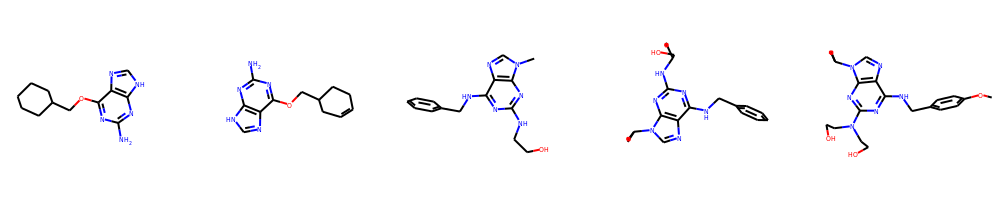

In [4]:
Draw.MolsToGridImage(cls3.ROMol.to_list(), molsPerRow=5)

In [5]:
mcs = rdFMCS.FindMCS(cls3.ROMol.to_list())

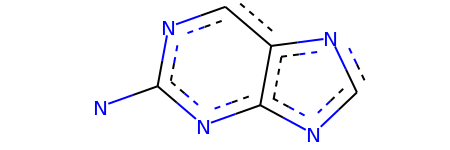

In [6]:
mcsrdmol = Chem.MolFromSmarts(mcs.smartsString)
mcsrdmol

In [7]:
from pychembldb import *
from razi.rdkit_postgresql.functions import mol_from_smarts

load rdk schema


In [8]:
q = chembldb.query(Mols)

In [9]:
q = q.filter(Mols.m.hassubstruct(mol_from_smarts(mcs.smartsString)))

In [10]:
q.count()

7014

True molregno: 1491


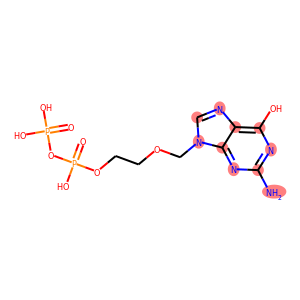

True molregno: 1579


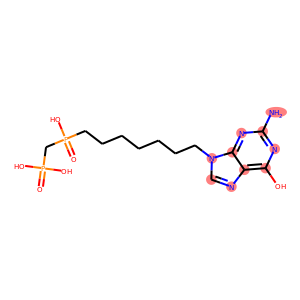

True molregno: 1588


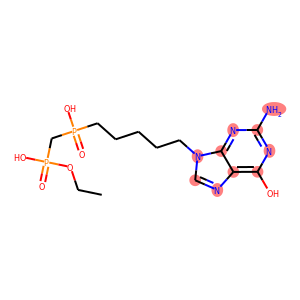

True molregno: 1659


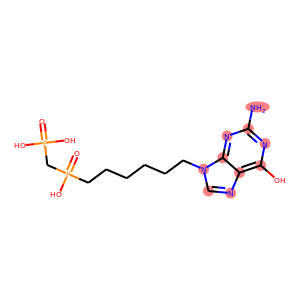

True molregno: 1693


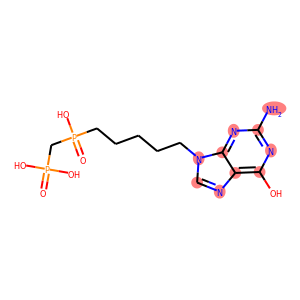

True molregno: 1694


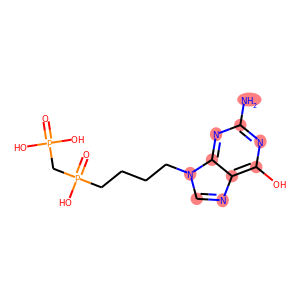

True molregno: 3401


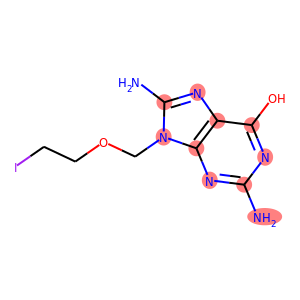

True molregno: 3419


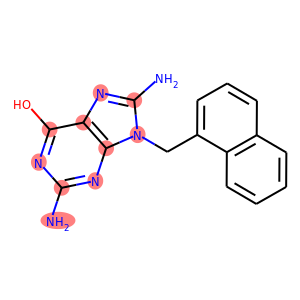

True molregno: 3427


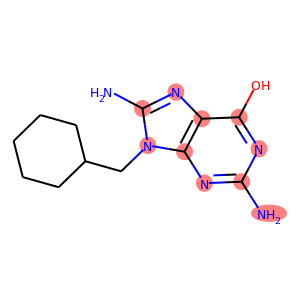

True molregno: 3429


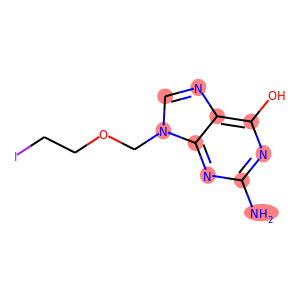

True molregno: 3459


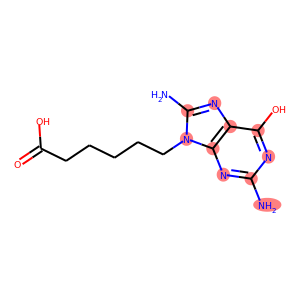

True molregno: 3465


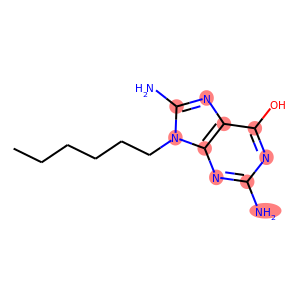

True molregno: 3498


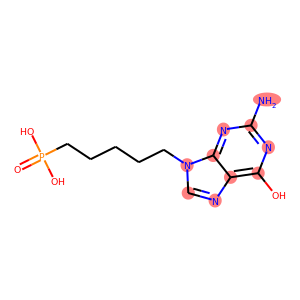

True molregno: 3505


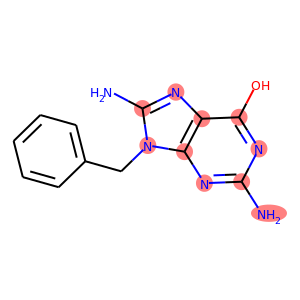

True molregno: 3523


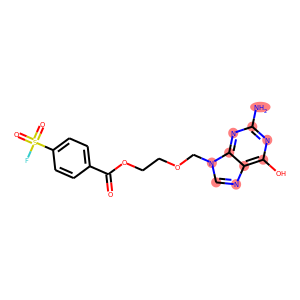

True molregno: 3542


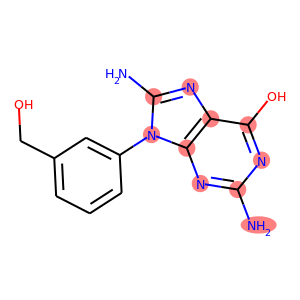

True molregno: 3626


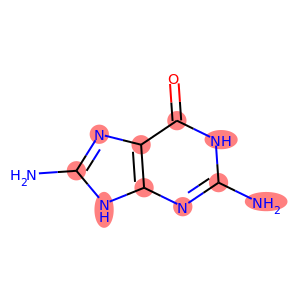

True molregno: 5830


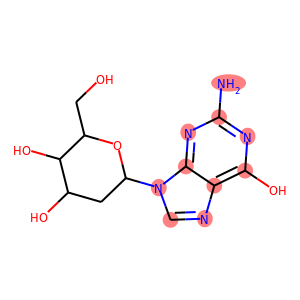

True molregno: 5937


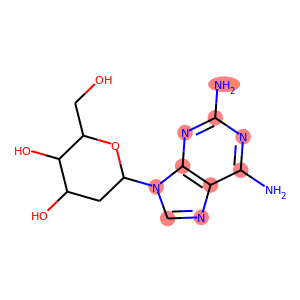

True molregno: 8964


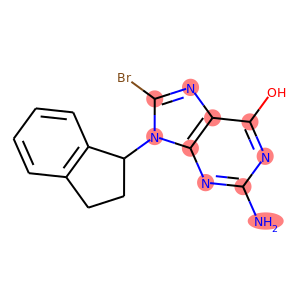

True molregno: 8824


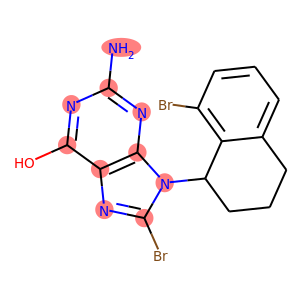

True molregno: 8831


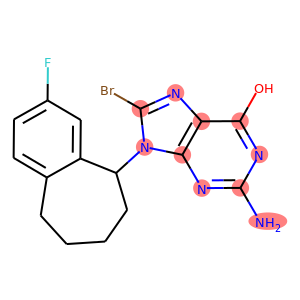

True molregno: 8870


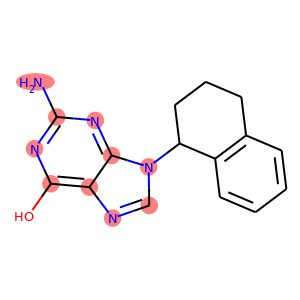

True molregno: 8956


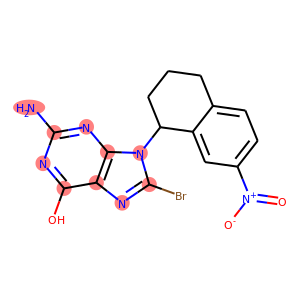

True molregno: 8911


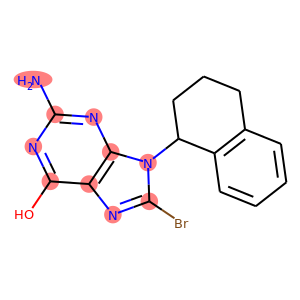

True molregno: 8945


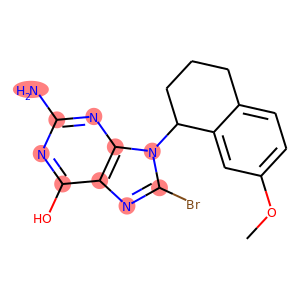

True molregno: 10083


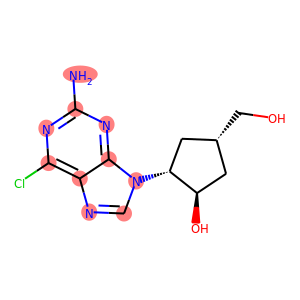

True molregno: 10155


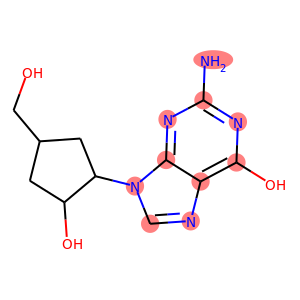

True molregno: 12208


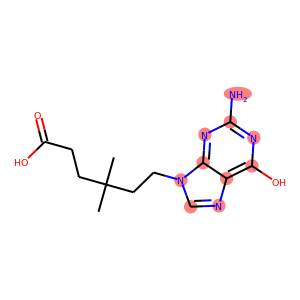

True molregno: 12091


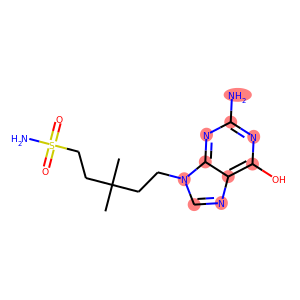

True molregno: 12101


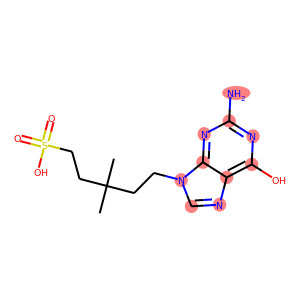

True molregno: 12176


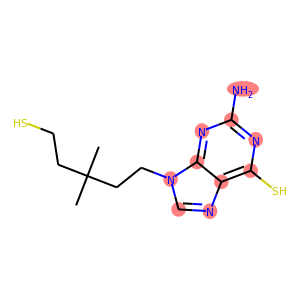

True molregno: 12177


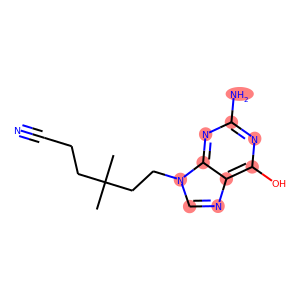

True molregno: 12180


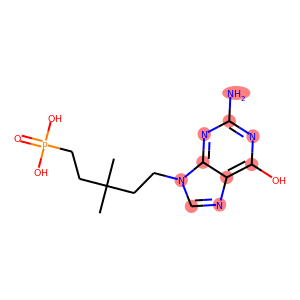

True molregno: 12181


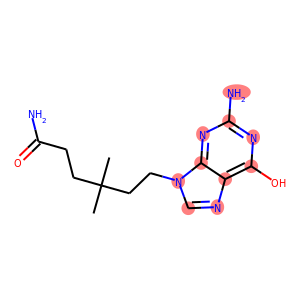

True molregno: 12638


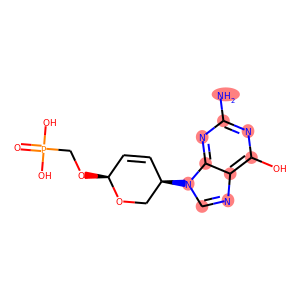

True molregno: 12796


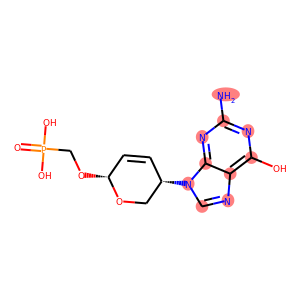

True molregno: 12807


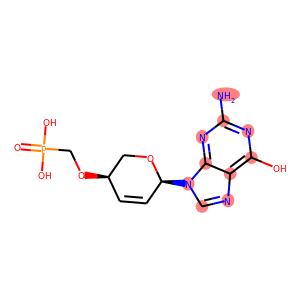

True molregno: 13368


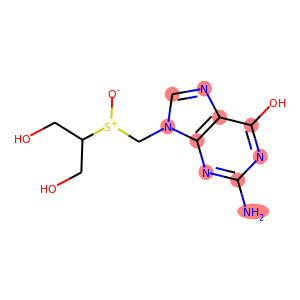

True molregno: 14090


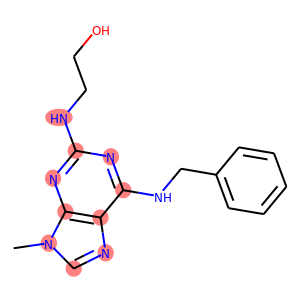

True molregno: 14221


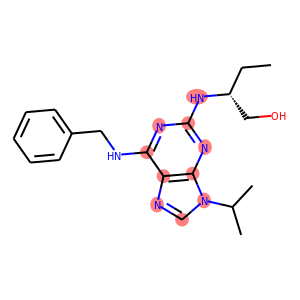

True molregno: 14842


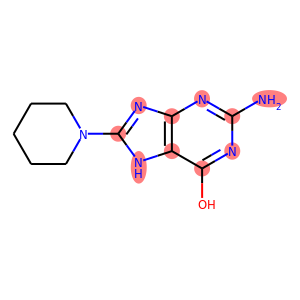

True molregno: 14883


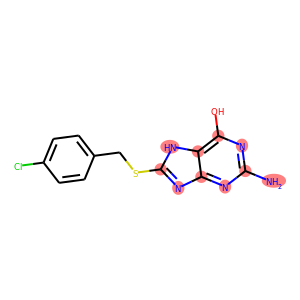

True molregno: 16578


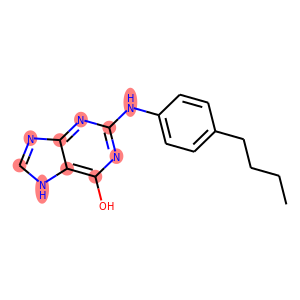

True molregno: 16624


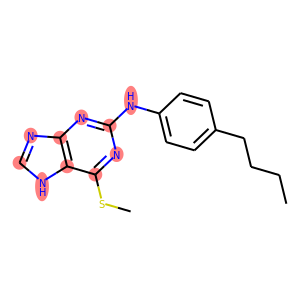

True molregno: 16896


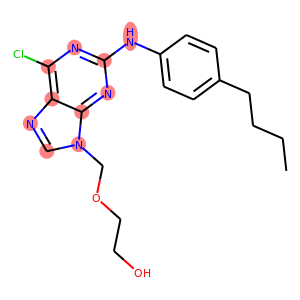

True molregno: 16669


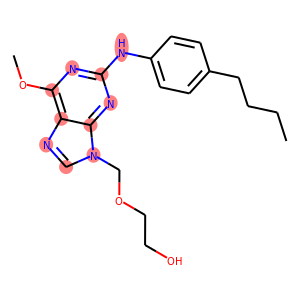

True molregno: 16670


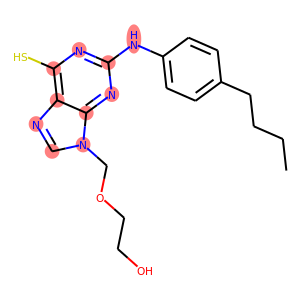

True molregno: 16837


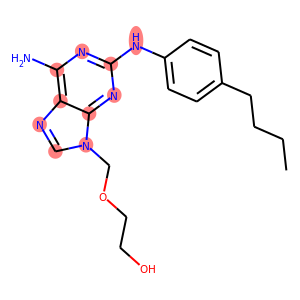

True molregno: 16838


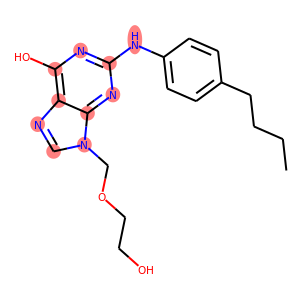

True molregno: 16907


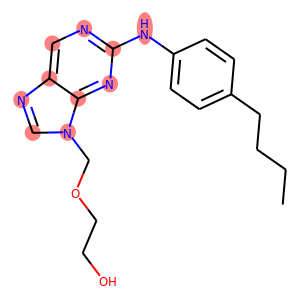

True molregno: 16956


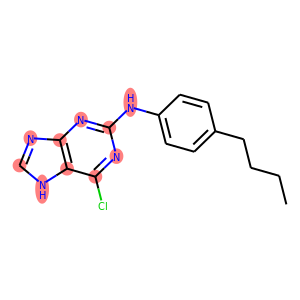

True molregno: 17052


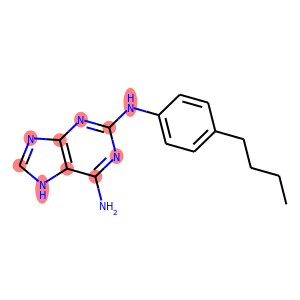

True molregno: 17095


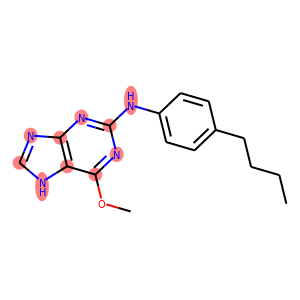

True molregno: 17096


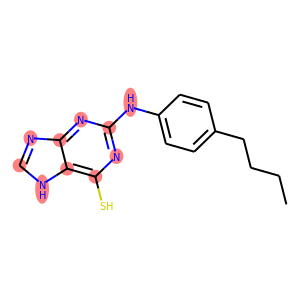

True molregno: 17128


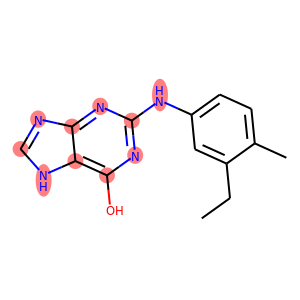

True molregno: 18110


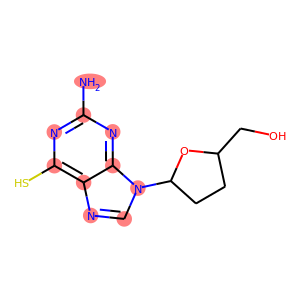

True molregno: 18129


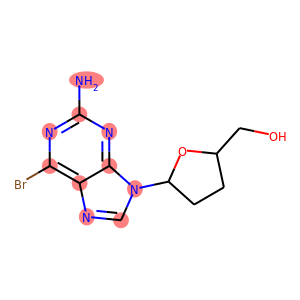

True molregno: 18325


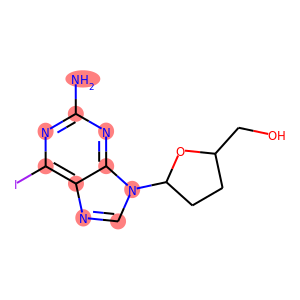

True molregno: 18577


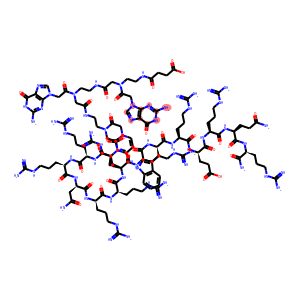

True molregno: 18597


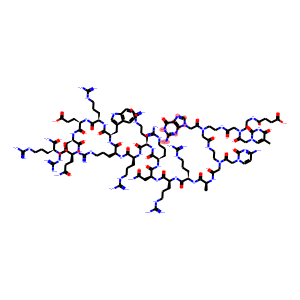

True molregno: 18598


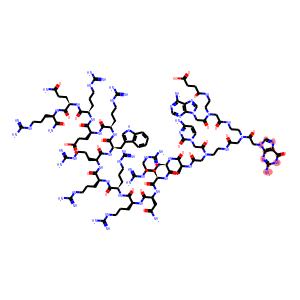

True molregno: 18613


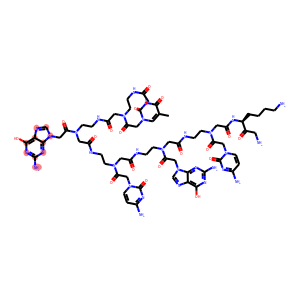

True molregno: 18614


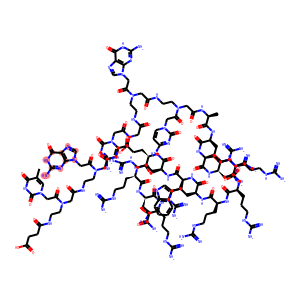

True molregno: 18663


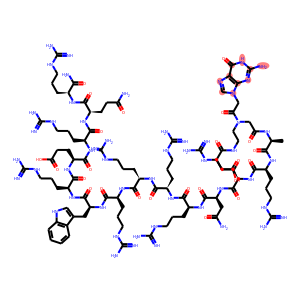

True molregno: 18758


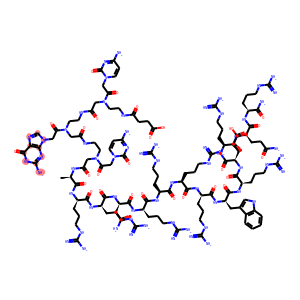

True molregno: 18818


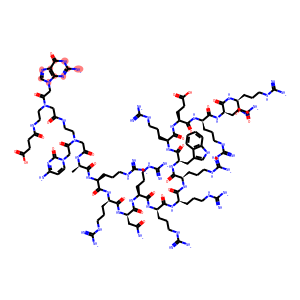

True molregno: 18848


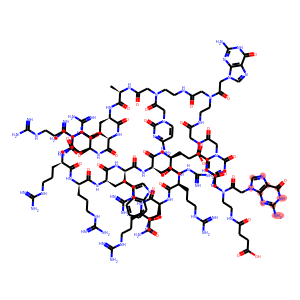

True molregno: 20011


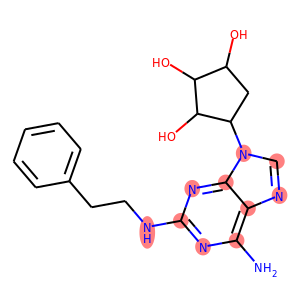

True molregno: 20012


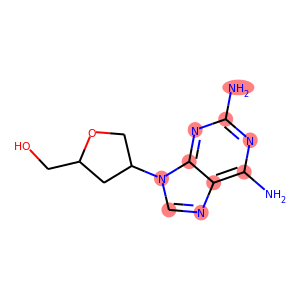

True molregno: 21093


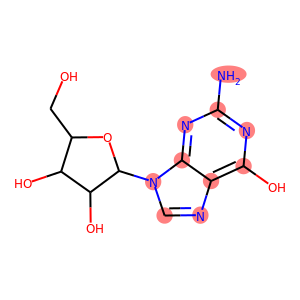

True molregno: 21211


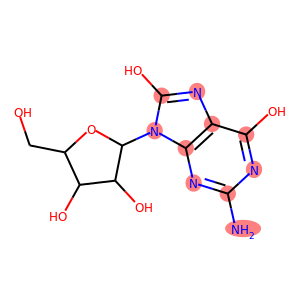

True molregno: 21749


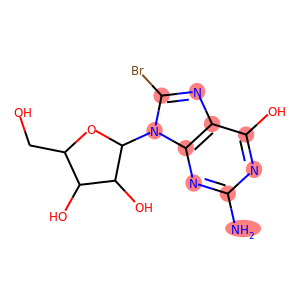

True molregno: 22711


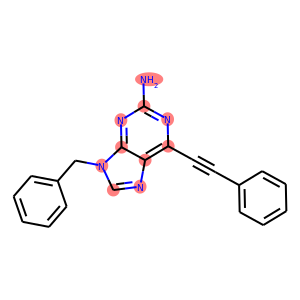

True molregno: 22773


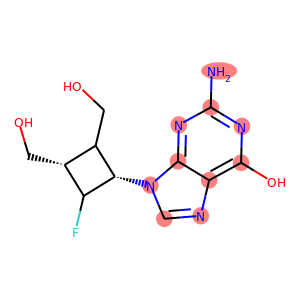

True molregno: 22790


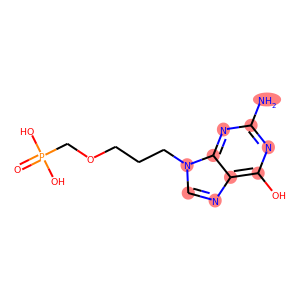

True molregno: 22801


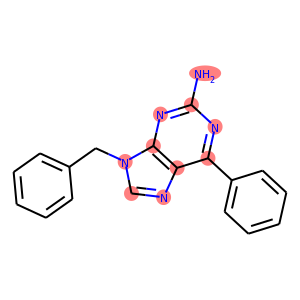

True molregno: 22848


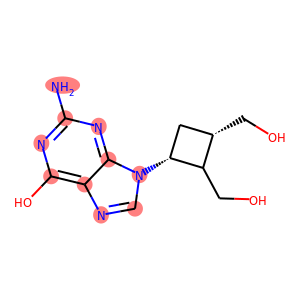

True molregno: 22892


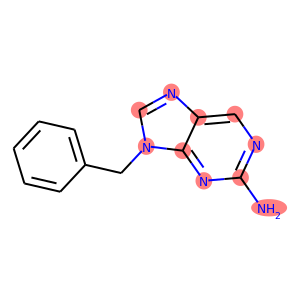

True molregno: 23035


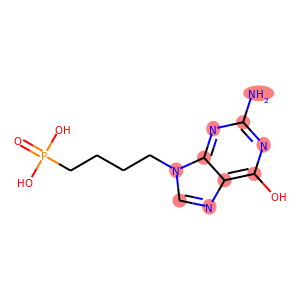

True molregno: 23087


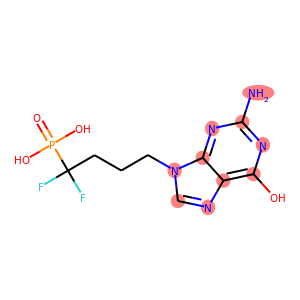

True molregno: 23130


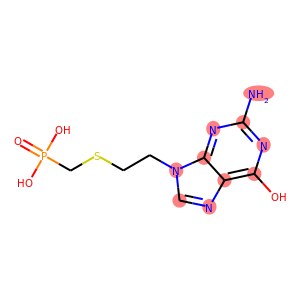

True molregno: 23190


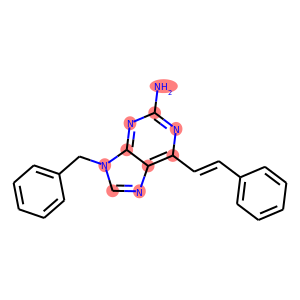

True molregno: 23300


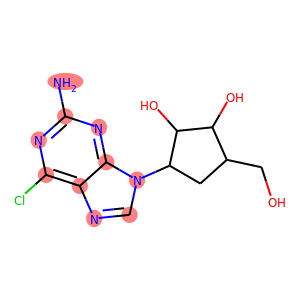

True molregno: 23820


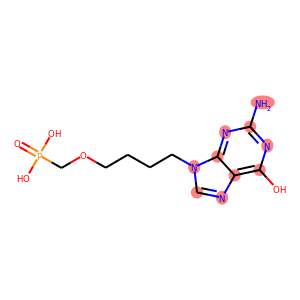

True molregno: 23438


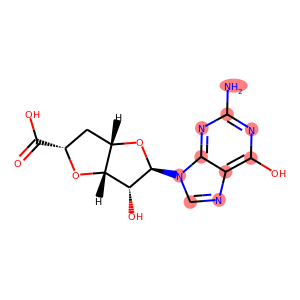

True molregno: 23750


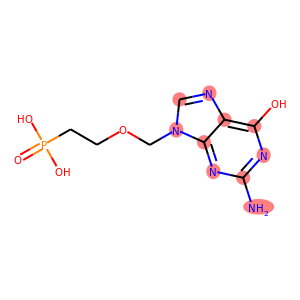

True molregno: 23765


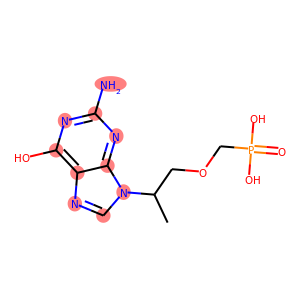

True molregno: 23883


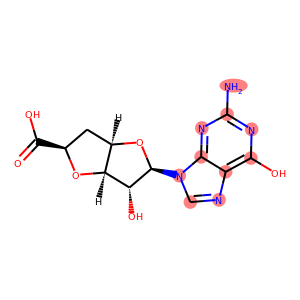

True molregno: 24113


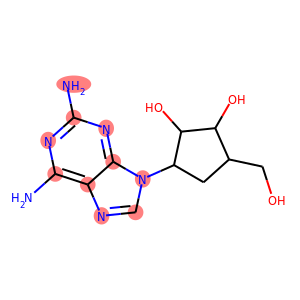

True molregno: 24198


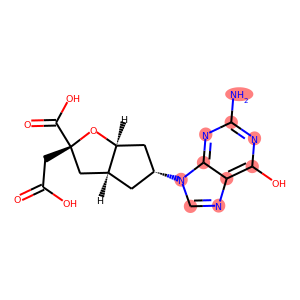

True molregno: 24227


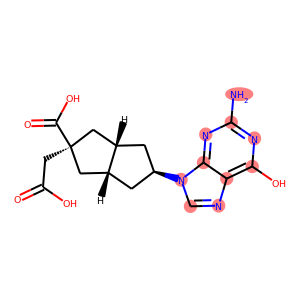

True molregno: 24228


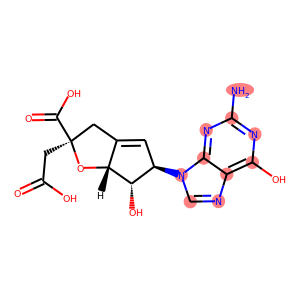

True molregno: 24231


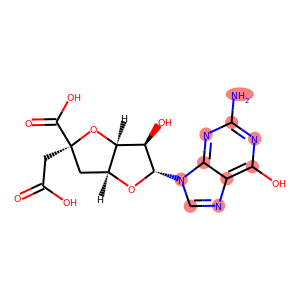

True molregno: 24232


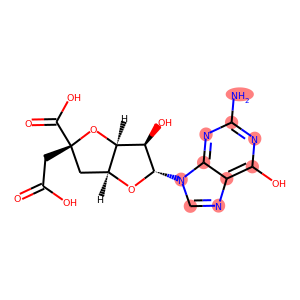

True molregno: 24265


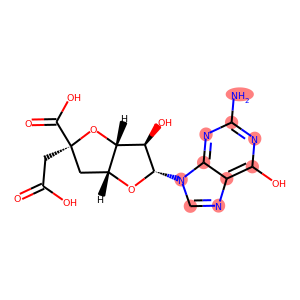

True molregno: 24312


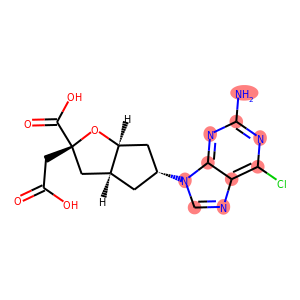

True molregno: 24348


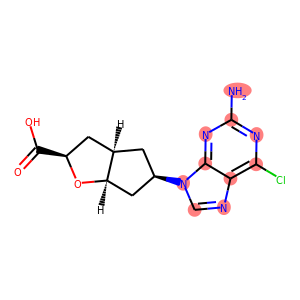

True molregno: 24374


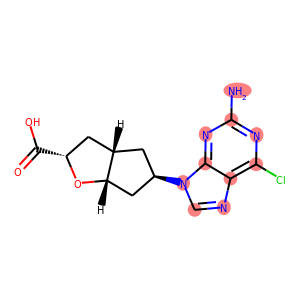

True molregno: 26429


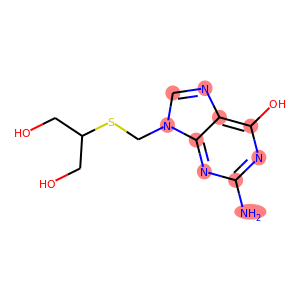

In [11]:
molregnos = []
for idx, row in enumerate(q):
    if idx == 100:
        break
    print(row.m.HasSubstructMatch(mcsrdmol), f'molregno: {row.molregno}')
    display(Draw.MolToImage(row.m, highlightAtoms=row.m.GetSubstructMatch(mcsrdmol)))